import the package


In [ ]:
%matplotlib inline
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.applications.resnet_v2 import preprocess_input 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### 1. Import the data


In [ ]:

import os
import zipfile

local_zip = '/content/picture.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/'

In [ ]:
picture_folders = ['angry500','happy500','relaxed500','sad500'] 

In [ ]:
data = [] 
target = [] 
for i in range(4): 
    animal = base_dir + picture_folders[i]
    picture_fnames = os.listdir(animal)
    for picture in picture_fnames:
        img_path = animal + '/' + picture
        img = load_img(img_path , target_size = (256,256)) #picture size 256*256
        x = img_to_array(img)
        data.append(x)
        target.append(i)

In [ ]:
data = np.array(data)

look the shape of the data

In [ ]:
data.shape  

(2000, 256, 256, 3)

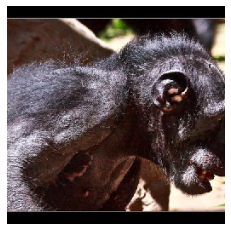

In [ ]:
n = 1
plt.imshow(data[n]/255)
plt.axis('off');

preprocess the data


In [ ]:
x_train = preprocess_input(data)

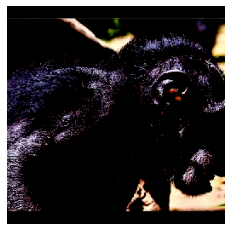

In [ ]:
plt.imshow(x_train[n]) 
plt.axis('off');

#  one-hot enconding。

In [ ]:
y_train = to_categorical(target, 4) 

In [ ]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_train[0]

array([1., 0., 0., 0.], dtype=float32)


read the resnet50 into our model


In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
resnet = ResNet50V2(include_top=False, pooling="avg")


build the model


In [ ]:
model = Sequential() 

In [ ]:
model.add(resnet) 

In [ ]:
model.add(Dense(4, activation='softmax')) 

In [ ]:
resnet.trainable = False  

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________


compile the model


In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
x_train.shape

(2000, 256, 256, 3)

In [ ]:
y_train.shape

(2000, 4)

fit our model

In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=10)

prediction

In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

63/63 [==============================] - 10s 131ms/step - loss: 0.6208 - accuracy: 0.7965
Loss: 0.6207798719406128
Accuracy: 0.796500027179718


In [ ]:
labels = ["angry","happy","relaxed","sad"]

In [ ]:
y_predict = np.argmax(model.predict(x_train), -1)

63/63 [==============================] - 8s 115ms/step


In [ ]:
#y_predict

array([0, 0, 3, ..., 0, 3, 3])

use gradio to show our result


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def classify_image(inp):
    inp = inp.reshape((-1, 256, 256, 3)) 
    inp = preprocess_input(inp)
    prediction = model.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(4)}

In [ ]:
image = gr.Image(shape=(256, 256), label="picture")
label = gr.Label(num_top_classes=4, label="result")
some_text="input one picture"

In [ ]:
sample_images = []
for i in range(4):
    animal = base_dir + picture_folders[i]
    for file in os.listdir(animal):
        sample_images.append(picture_folders[i] + '/' + file)

In [ ]:
gr.Interface(fn=classify_image, 
             inputs=image, 
             outputs=label,
             title="dog emotion",
             description=some_text,
             examples=sample_images).launch(share=True)